In [1]:
import pandas as pd
import geopandas as gpd
import os

### Read touristic housing data

In [2]:
mun_gdf = gpd.read_file(os.path.join('data', 'municipalities.geojson'))
#mun_gdf['NATCODE'] = pd.to_numeric(mun_gdf['NATCODE'])

In [3]:
mun_gdf.head()

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,geometry
0,16266,34081616266,33.429,0,0.00,Villarejo-Periesteban,"MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39..."
1,16269,34081616269,70.160,1,0.15,Villares,"MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39..."
2,16270,34081616270,28.256,0,0.00,Villarrubio,"MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39..."
3,16271,34081616271,25.616,0,0.00,Villarta,"MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39..."
4,16272,34081616272,145.106,3,0.48,Villas,"MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40..."


In [4]:
mun_gdf.crs.axis_info[0].unit_name

'degree'

In [5]:
mun_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
mun_gdf.iloc[0]['geometry'].area

0.0035198414406405706

In [7]:
mun_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8205 entries, 0 to 8204
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CODIGOINE  8205 non-null   object  
 1   NATCODE    8205 non-null   object  
 2   area_km2   8205 non-null   float64 
 3   Viv-total  8112 non-null   object  
 4   Viv-rel    8112 non-null   float64 
 5   Name       8112 non-null   object  
 6   geometry   8205 non-null   geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 448.8+ KB


In [8]:
mun_gdf[mun_gdf['CODIGOINE']=='28079']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,geometry
472,28079,34132828079,604.98,16.894,1.1,Madrid,"MULTIPOLYGON (((-3.88558 40.57446, -3.88522 40..."


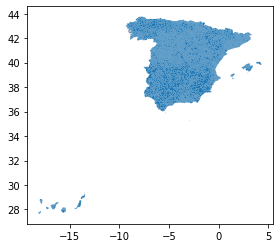

In [9]:
mun_gdf.plot()

### Read hotels data

In [10]:
hotels = pd.read_csv(os.path.join('data','hotels v5.csv'),sep=';')
hotels['NATCODE'] = hotels['NATCODE'].astype(str)

In [11]:
hotels.head()

,id,name,lat,lon,category,NATCODE,NAMEUNIT,CODNUT3,ID_CP,COD_POSTAL,CODIGO_INE,tags
0,3097389830,Antequera,35.276040,-2.941666,hostel,34195252001,Melilla,ES640,520010000005,52006,52001,NaN
1,3097229292,Hostal Rioja,35.293680,-2.939014,hostel,34195252001,Melilla,ES640,520010000002,52001,52001,NaN
2,3097410226,La Rosa Blanca,35.295350,-2.942991,hostel,34195252001,Melilla,ES640,520010000007,52002,52001,NaN
3,7138852513,Centro de Menores La Esperanza,35.884890,-5.335062,hostel,34185151001,Ceuta,ES630,510010000003,51002,51001,NaN
4,8428039731,Ulises,35.887417,-5.309926,hotel,34185151001,Ceuta,ES630,510010000005,51001,51001,NaN


In [12]:
total_hotels = hotels.shape[0]
print(f'Total hotels: {total_hotels}')

Total hotels: 15110


In [13]:
hotels['category'].unique()

array(['hostel', 'hotel', 'guest_house', 'Resort', 'Boarding House',
       'motel', 'Bed & Breakfast', 'Vacation Rental', 'Golf Course',
       'Building', 'Residential Building (Apartment / Condo)', 'Spa',
       'Roof Deck', 'Restaurant', 'Historic Site', 'Pool',
       'Spanish Restaurant', 'Stables', 'Campground', 'Café',
       'Mediterranean Restaurant', 'Gastropub', 'Inn', 'Assisted Living',
       'Bar', 'Tapas Restaurant', 'Farm', 'Rest Area', 'Water Park',
       'Harbor / Marina', 'Italian Restaurant', 'Housing Development',
       'Scenic Lookout', 'General Entertainment', 'Event Space',
       'Coffee Shop', 'Turkish Home Cooking Restaurant', 'BBQ Joint',
       'Wine Shop', 'Conference Room', 'Seafood Restaurant', 'Ski Lodge',
       'Gym', 'Beer Garden', 'Paella Restaurant', 'Food',
       'Convention Center', 'Other Great Outdoors', 'Hot Spring',
       'Winery', 'College Residence Hall', 'Art Gallery', 'Travel Agency',
       'Gym / Fitness Center', 'Castle', 'Diner',

In [14]:
hotels[hotels['category']=='Paella Restaurant']

,id,name,lat,lon,category,NATCODE,NAMEUNIT,CODNUT3,ID_CP,COD_POSTAL,CODIGO_INE,tags
6933,513ca136f136c9d7ce9d688f,Hotel Restaurant L'Algadir del Delta,40.646759,0.688008,Paella Restaurant,34094343014,Amposta,ES514,430140000003,43549,43014,NaN
6959,4dfdf73eaeb7594e86252a25,Hotel Mediterrani Blau,40.657126,0.779821,Paella Restaurant,34094343014,Amposta,ES514,430140000004,43879,43014,NaN


### Read camping data

In [15]:
cdf = pd.read_csv(os.path.join('data','spain_campings.csv'), index_col=0)
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 918
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   changeset         919 non-null    int64  
 1   id                919 non-null    int64  
 2   lon               919 non-null    float64
 3   tags              339 non-null    object 
 4   lat               919 non-null    float64
 5   timestamp         919 non-null    int64  
 6   version           919 non-null    int64  
 7   addr:city         108 non-null    object 
 8   addr:country      9 non-null      object 
 9   addr:full         2 non-null      object 
 10  addr:housenumber  88 non-null     object 
 11  addr:housename    1 non-null      object 
 12  addr:postcode     153 non-null    float64
 13  addr:place        4 non-null      object 
 14  addr:street       207 non-null    object 
 15  email             55 non-null     object 
 16  name              700 non-null    object 
 1

In [16]:
camping_gdf = gpd.GeoDataFrame(cdf, geometry=gpd.points_from_xy(cdf.lon, cdf.lat))
camping_gdf.crs = mun_gdf.crs

In [17]:
camping_gdf.head()

,changeset,id,lon,tags,lat,timestamp,version,addr:city,addr:country,addr:full,...,name,opening_hours,operator,phone,url,website,camp_site,tourism,geometry,osm_type
0,0,26860857,-3.688983,NaN,40.317295,0,0,NaN,NaN,NaN,...,Alpha,NaN,NaN,NaN,NaN,https://www.campingalpha.com/,NaN,camp_site,POINT (-3.68898 40.31730),node
1,0,26860866,-3.907500,NaN,40.381110,0,0,NaN,NaN,NaN,...,Arco Iris,NaN,NaN,NaN,NaN,NaN,NaN,camp_site,POINT (-3.90750 40.38111),node
2,0,26860889,3.200000,NaN,41.940277,0,0,NaN,NaN,NaN,...,Càmping Begur,NaN,NaN,NaN,NaN,NaN,NaN,camp_site,POINT (3.20000 41.94028),node
3,0,26860899,1.357838,NaN,42.373090,0,0,NaN,NaN,NaN,...,Buchaca,NaN,NaN,+34 973 352 155,NaN,NaN,NaN,camp_site,POINT (1.35784 42.37309),node
4,-96,26860911,-0.052381,"{""description"":""El Camping Pepe destaca por su...",38.894115,-96,-96,Oliva,NaN,NaN,...,Camping Pepe,NaN,NaN,+34 96 285 75 19,NaN,http://campingpepe.com/,NaN,camp_site,POINT (-0.05238 38.89411),node


We calculate the number of hotels per city

In [18]:
hotels[hotels['CODIGO_INE']==28079]

,id,name,lat,lon,category,NATCODE,NAMEUNIT,CODNUT3,ID_CP,COD_POSTAL,CODIGO_INE,tags
5919,3444635664,Hotel Diana Plus,40.366135,-3.654341,hotel,34132828079,Madrid,ES300,280790000001,28053,28079,NaN
5945,1897058736,Pensión Bulevar,40.378090,-3.615090,motel,34132828079,Madrid,ES300,280790000050,28031,28079,NaN
5959,1437313179,Hostal Granado Madrid,40.386760,-3.744978,hotel,34132828079,Madrid,ES300,280790000008,28047,28079,NaN
5960,4d46accc7e2e5481d3bd758f,NH Reservation Center,40.387728,-3.692306,hotel,34132828079,Madrid,ES300,280790000006,28045,28079,NaN
5961,3609653257,Hotel Madrid Río,40.388676,-3.700315,hotel,34132828079,Madrid,ES300,280790000042,28026,28079,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6679,5332bb94498e6e9fe3e7fa20,Premium Air Rooms,40.491218,-3.593389,hotel,34132828079,Madrid,ES300,280790000014,28042,28079,NaN
6704,4b6dda67f964a520e2952ce3,Hotel NH Madrid Las Tablas,40.498260,-3.664582,hotel,34132828079,Madrid,ES300,280790000016,28050,28079,NaN
6705,4c0c0603340720a167078993,Hesperia Andorra,40.498409,-3.591594,hotel,34132828079,Madrid,ES300,280790000014,28042,28079,NaN
6728,515403c2e4b0dfc99a1304ed,hm balanguera palma de mallorca,40.508938,-3.667807,hotel,34132828079,Madrid,ES300,280790000016,28050,28079,NaN


In [19]:
n_hotels_by_mun_df= hotels.groupby('NATCODE').size().to_frame()
n_hotels_by_mun_df.columns = ['hotels-total']

In [20]:
n_hotels_by_mun_df['hotels-rel'] = n_hotels_by_mun_df['hotels-total']/total_hotels
n_hotels_by_mun_df = n_hotels_by_mun_df.reset_index()

In [21]:
n_hotels_by_mun_df.head()

,NATCODE,hotels-total,hotels-rel
0,34010404001,1,0.000066
1,34010404003,3,0.000199
2,34010404004,1,0.000066
3,34010404005,1,0.000066
4,34010404006,1,0.000066


In [22]:
n_hotels_by_mun_df[n_hotels_by_mun_df['NATCODE']=='34132828079']

,NATCODE,hotels-total,hotels-rel
3035,34132828079,519,0.034348


Add the number of hotels per city to the dataframe

In [23]:
mun_gdf[mun_gdf['NATCODE']=='34132828079']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,geometry
472,28079,34132828079,604.98,16.894,1.1,Madrid,"MULTIPOLYGON (((-3.88558 40.57446, -3.88522 40..."


In [24]:
mun_tourist_gdf = mun_gdf.merge(n_hotels_by_mun_df, left_on='NATCODE', right_on='NATCODE', how='left')
mun_tourist_gdf.head()

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,geometry,hotels-total,hotels-rel
0,16266,34081616266,33.429,0,0.00,Villarejo-Periesteban,"MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39...",NaN,NaN
1,16269,34081616269,70.160,1,0.15,Villares,"MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39...",NaN,NaN
2,16270,34081616270,28.256,0,0.00,Villarrubio,"MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39...",1.0,0.000066
3,16271,34081616271,25.616,0,0.00,Villarta,"MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39...",NaN,NaN
4,16272,34081616272,145.106,3,0.48,Villas,"MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40...",NaN,NaN


In [25]:
mun_tourist_gdf[mun_tourist_gdf['NATCODE']== '34132828079']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,geometry,hotels-total,hotels-rel
472,28079,34132828079,604.98,16.894,1.1,Madrid,"MULTIPOLYGON (((-3.88558 40.57446, -3.88522 40...",519.0,0.034348


In [26]:
mun_tourist_gdf['hotels-rel'].sum()

0.999867637326274

In [27]:
mun_tourist_gdf['Viv-rel'].sum()

6596.51

In [28]:
mgdf = mun_gdf[['NATCODE','geometry']]
mgdf.head()

,NATCODE,geometry
0,34081616266,"MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39..."
1,34081616269,"MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39..."
2,34081616270,"MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39..."
3,34081616271,"MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39..."
4,34081616272,"MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40..."


In [29]:
camping_gdf=gpd.sjoin(mgdf, camping_gdf, how='right')

In [30]:
camping_gdf.head()

,index_left,NATCODE,changeset,id,lon,tags,lat,timestamp,version,addr:city,...,name,opening_hours,operator,phone,url,website,camp_site,tourism,geometry,osm_type
0,459.0,34132828065,0,26860857,-3.688983,NaN,40.317295,0,0,NaN,...,Alpha,NaN,NaN,NaN,NaN,https://www.campingalpha.com/,NaN,camp_site,POINT (-3.68898 40.31730),node
1,568.0,34132828181,0,26860866,-3.907500,NaN,40.381110,0,0,NaN,...,Arco Iris,NaN,NaN,NaN,NaN,NaN,NaN,camp_site,POINT (-3.90750 40.38111),node
2,2103.0,34091717013,0,26860889,3.200000,NaN,41.940277,0,0,NaN,...,Càmping Begur,NaN,NaN,NaN,NaN,NaN,NaN,camp_site,POINT (3.20000 41.94028),node
3,2434.0,34092525140,0,26860899,1.357838,NaN,42.373090,0,0,NaN,...,Buchaca,NaN,NaN,+34 973 352 155,NaN,NaN,NaN,camp_site,POINT (1.35784 42.37309),node
4,7611.0,34104646181,-96,26860911,-0.052381,"{""description"":""El Camping Pepe destaca por su...",38.894115,-96,-96,Oliva,...,Camping Pepe,NaN,NaN,+34 96 285 75 19,NaN,http://campingpepe.com/,NaN,camp_site,POINT (-0.05238 38.89411),node


In [31]:
camping_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 919 entries, 0 to 918
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index_left        914 non-null    float64 
 1   NATCODE           914 non-null    object  
 2   changeset         919 non-null    int64   
 3   id                919 non-null    int64   
 4   lon               919 non-null    float64 
 5   tags              339 non-null    object  
 6   lat               919 non-null    float64 
 7   timestamp         919 non-null    int64   
 8   version           919 non-null    int64   
 9   addr:city         108 non-null    object  
 10  addr:country      9 non-null      object  
 11  addr:full         2 non-null      object  
 12  addr:housenumber  88 non-null     object  
 13  addr:housename    1 non-null      object  
 14  addr:postcode     153 non-null    float64 
 15  addr:place        4 non-null      object  
 16  addr:street       

In [32]:
camping_gdf[camping_gdf['NATCODE']=='34010404013']

,index_left,NATCODE,changeset,id,lon,tags,lat,timestamp,version,addr:city,...,name,opening_hours,operator,phone,url,website,camp_site,tourism,geometry,osm_type
490,2659.0,34010404013,0,4933812222,-2.443428,"{""name:nl"":""Camperplaats bij Auditorium""}",36.824684,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,caravan_site,POINT (-2.44343 36.82468),node
559,2659.0,34010404013,0,5414107822,-2.466476,NaN,36.831090,0,0,NaN,...,Muelle levante,NaN,NaN,NaN,NaN,NaN,NaN,caravan_site,POINT (-2.46648 36.83109),node
666,2659.0,34010404013,0,6001734588,-2.516344,NaN,36.826260,0,103,NaN,...,La Garrofa,NaN,NaN,NaN,NaN,NaN,NaN,camp_site,POINT (-2.51634 36.82626),node


In [33]:
n_camps_by_mun_df= camping_gdf.groupby('NATCODE').size().to_frame()
n_camps_by_mun_df.columns = ['camps-total']
n_camps_by_mun_df['camps-rel'] = n_camps_by_mun_df['camps-total']/total_hotels
n_camps_by_mun_df = n_camps_by_mun_df.reset_index()
n_camps_by_mun_df.head()

,NATCODE,camps-total,camps-rel
0,34010404013,3,0.000199
1,34010404014,1,0.000066
2,34010404029,1,0.000066
3,34010404035,1,0.000066
4,34010404048,1,0.000066


In [34]:
n_camps_by_mun_df[n_camps_by_mun_df['NATCODE']=='34132828079']

,NATCODE,camps-total,camps-rel


In [35]:
mun_tourist_gdf = mun_tourist_gdf.merge(n_camps_by_mun_df, left_on='NATCODE', right_on='NATCODE', how='left')
mun_tourist_gdf.head(20)

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,geometry,hotels-total,hotels-rel,camps-total,camps-rel
0,16266,34081616266,33.429,0,0.00,Villarejo-Periesteban,"MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39...",NaN,NaN,NaN,NaN
1,16269,34081616269,70.160,1,0.15,Villares,"MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39...",NaN,NaN,NaN,NaN
2,16270,34081616270,28.256,0,0.00,Villarrubio,"MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39...",1.0,0.000066,NaN,NaN
3,16271,34081616271,25.616,0,0.00,Villarta,"MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39...",NaN,NaN,NaN,NaN
4,16272,34081616272,145.106,3,0.48,Villas,"MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40...",NaN,NaN,NaN,NaN
5,16273,34081616273,21.205,1,0.31,Villaverde,"MULTIPOLYGON (((-2.32789 39.78402, -2.32392 39...",NaN,NaN,NaN,NaN
6,06056,34110606056,84.139,1,0.22,Garbayuela,"MULTIPOLYGON (((-5.06845 39.02531, -5.06861 39...",NaN,NaN,NaN,NaN
7,16274,34081616274,68.904,0,0.00,Víllora,"MULTIPOLYGON (((-1.67836 39.75012, -1.67529 39...",1.0,0.000066,NaN,NaN
8,16275,34081616275,25.252,0,0.00,Vindel,"MULTIPOLYGON (((-2.41628 40.58842, -2.41628 40...",NaN,NaN,NaN,NaN
9,16276,34081616276,28.836,0,0.00,Yémeda,"MULTIPOLYGON (((-1.79342 39.77815, -1.79269 39...",1.0,0.000066,NaN,NaN


In [36]:
mun_tourist_gdf= mun_tourist_gdf.fillna(0)

In [37]:
mun_tourist_gdf[mun_tourist_gdf['NATCODE']== '34132828079']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,geometry,hotels-total,hotels-rel,camps-total,camps-rel
472,28079,34132828079,604.98,16.894,1.1,Madrid,"MULTIPOLYGON (((-3.88558 40.57446, -3.88522 40...",519.0,0.034348,0.0,0.0


In [38]:
mun_tourist_gdf.isna().sum()

CODIGOINE       0
NATCODE         0
area_km2        0
Viv-total       0
Viv-rel         0
Name            0
geometry        0
hotels-total    0
hotels-rel      0
camps-total     0
camps-rel       0
dtype: int64

In [39]:
mun_tourist_gdf[mun_tourist_gdf['CODIGOINE']=='28062']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,geometry,hotels-total,hotels-rel,camps-total,camps-rel
456,28062,34132828062,40.36,2,0.3,Garganta,"MULTIPOLYGON (((-3.72530 40.93501, -3.72530 40...",1.0,0.000066,0.0,0.0


In [40]:
mun_tourist_gdf[mun_tourist_gdf['CODIGOINE']=='30030']

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,geometry,hotels-total,hotels-rel,camps-total,camps-rel
605,30030,34143030030,885.96,840,0.4,Murcia,"MULTIPOLYGON (((-1.08456 37.71601, -1.08503 37...",43.0,0.002846,2.0,0.000132


### Add population data

In [41]:
mun_population = pd.read_csv(os.path.join('data', 'pobmun20.csv'), sep=';',dtype={'CPRO':str, 'CMUN':str})
mun_population['CODIGOINE']= mun_population['CPRO'] + mun_population['CMUN']

In [42]:
mun_population.head()

,CPRO,PROVINCIA,CMUN,NOMBRE,POB20,HOMBRES,MUJERES,CODIGOINE
0,02,Albacete,001,Abengibre,761,365,396,02001
1,02,Albacete,002,Alatoz,506,283,223,02002
2,02,Albacete,003,Albacete,174336,85214,89122,02003
3,02,Albacete,004,Albatana,679,351,328,02004
4,02,Albacete,005,Alborea,664,346,318,02005


In [43]:
mun_population[['CODIGOINE', 'POB20', 'HOMBRES', 'MUJERES']]

,CODIGOINE,POB20,HOMBRES,MUJERES
0,02001,761,365,396
1,02002,506,283,223
2,02003,174336,85214,89122
3,02004,679,351,328
4,02005,664,346,318
...,...,...,...,...
8126,50282,62,31,31
8127,50295,48,27,21
8128,50296,447,229,218
8129,50297,681877,326103,355774


In [44]:
mun_tourist_gdf = mun_tourist_gdf.merge(mun_population[['CODIGOINE', 'POB20', 'HOMBRES', 'MUJERES']], left_on='CODIGOINE', right_on='CODIGOINE')
mun_tourist_gdf['Viv-total'] = pd.to_numeric(mun_tourist_gdf['Viv-total'])

In [45]:
mun_tourist_gdf['Viv-per-pop']= mun_tourist_gdf['Viv-total'] / mun_tourist_gdf['POB20']
mun_tourist_gdf['hotels-per-pop']= mun_tourist_gdf['hotels-total'] / mun_tourist_gdf['POB20']
mun_tourist_gdf['camps-per-pop']= mun_tourist_gdf['camps-total'] / mun_tourist_gdf['POB20']

mun_tourist_gdf['Viv-per-area']= mun_tourist_gdf['Viv-total'] / mun_tourist_gdf['area_km2']
mun_tourist_gdf['hotels-per-area']= mun_tourist_gdf['hotels-total'] / mun_tourist_gdf['area_km2']
mun_tourist_gdf['camps-per-area']= mun_tourist_gdf['camps-total'] / mun_tourist_gdf['area_km2']

In [46]:
mun_tourist_gdf.head()

,CODIGOINE,NATCODE,area_km2,Viv-total,Viv-rel,Name,geometry,hotels-total,hotels-rel,camps-total,camps-rel,POB20,HOMBRES,MUJERES,Viv-per-pop,hotels-per-pop,camps-per-pop,Viv-per-area,hotels-per-area,camps-per-area
0,16266,34081616266,33.429,0.0,0.00,Villarejo-Periesteban,"MULTIPOLYGON (((-2.47791 39.88027, -2.47793 39...",0.0,0.000000,0.0,0.0,382,190,192,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,16269,34081616269,70.160,1.0,0.15,Villares,"MULTIPOLYGON (((-2.58669 39.85793, -2.58601 39...",0.0,0.000000,0.0,0.0,414,211,203,0.002415,0.000000,0.0,0.014253,0.000000,0.0
2,16270,34081616270,28.256,0.0,0.00,Villarrubio,"MULTIPOLYGON (((-2.96423 39.95773, -2.96231 39...",1.0,0.000066,0.0,0.0,191,107,84,0.000000,0.005236,0.0,0.000000,0.035391,0.0
3,16271,34081616271,25.616,0.0,0.00,Villarta,"MULTIPOLYGON (((-1.68041 39.46783, -1.67391 39...",0.0,0.000000,0.0,0.0,843,412,431,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,16272,34081616272,145.106,3.0,0.48,Villas,"MULTIPOLYGON (((-2.49911 40.26601, -2.49878 40...",0.0,0.000000,0.0,0.0,213,122,91,0.014085,0.000000,0.0,0.020675,0.000000,0.0


In [47]:
mun_tourist_gdf.to_file(os.path.join('data','mun_tourist.geojson'),driver='GeoJSON')

In [48]:
print("That's all folks!")

That's all folks!
